# Mini Project 

## About

## Contributors
- Le Qi - 
- Abigail -
- Shu Fang -

## Problem Definition
- Explore the correlation between certain mushrooms features and its edibility
- Find out which variable is best to predict whether the mushroom is edible or not
- Which model would be the best for predicting the edibility of the mushroom?
- Are we then able to accurately predict whether a mushroom is edible based of its features?

## Models Used
1. Binary Classification
2. 

## Conclusion

## What did we learn from this project?

In [73]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer

### Import the Dataset
The dataset is in CSV format; hence we use the `read_csv` function with `delimiter` parameter from Pandas. Immediately after importing, we take a quick look at the data using the `head` function.

In [74]:
mushroom = pd.read_csv('mushroom.csv', delimiter= ';')
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [75]:
# Check the vital statistics of the dataset
print("Data type : ", type(mushroom))
print("Data dims : ", mushroom.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (61069, 21)


In [76]:
# Check the data types of the variables in the dataset
print(mushroom.dtypes)

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object


# Cleaning the Dataset



### Properly naming the variables in each column


In [77]:
# Create a copy of the Dataset
mushroom_clean = mushroom.copy()

# Convert all the columns with datatype equal to 'object' to category
# .loc[:,mushroom_clean_dtypes == 'object'] => to locate the variables of object data types
# select_dtypes(['object']) => to select the object data types
# apply => pass a function and apply it to every selected value
# (lambda x: x.astype('category')) => assigning the astype function to x using lambda
# astype => change a pandas object to a specified dtype, in this case it is categorical
mushroom_clean.loc[:,mushroom_clean.dtypes == 'object'] = mushroom_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))
print(mushroom_clean.dtypes)



# Renaming the data for each category columns
mushroom_clean['class'] = mushroom_clean['class'].cat.rename_categories({'p':'Poisonous', 'e':'Edible'})
mushroom_clean['cap-shape'] = mushroom_clean['cap-shape'].cat.rename_categories({'b':'Bell', 'c':'Conical', 'x':'Convex', 'f':'Flat', 's':'Sunken', 'p':'Spherical', 'o':'Others'})
mushroom_clean['cap-surface'] = mushroom_clean['cap-surface'].cat.rename_categories({'i':'Brous', 'g':'Grooves', 'y':'Scaly', 's':'Smooth', 'h':'Shiny', 'l':'Leathery', 'k':'silky', 't':'Sticky', 'w':'Wrinkled', 'e':'Flesh', 'd':'Dry'})
mushroom_clean['cap-color'] = mushroom_clean['cap-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black'})
mushroom_clean['does-bruise-or-bleed'] = mushroom_clean['does-bruise-or-bleed'].cat.rename_categories({'t':'Bruises or Bleeds', 'f':'Neither'})
mushroom_clean['gill-attachment'] = mushroom_clean['gill-attachment'].cat.rename_categories({'a':'Adnate', 'x':'Adnexed', 'd':'Decurrent', 'e':'Free', 's':'Sinuate', 'p':'Pores', 'f':'None'})
mushroom_clean['gill-spacing'] = mushroom_clean['gill-spacing'].cat.rename_categories({'c':'Close', 'd':'Distant', 'f':'None'})
mushroom_clean['gill-color'] = mushroom_clean['gill-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['stem-root'] = mushroom_clean['stem-root'].cat.rename_categories({'b':'Bulbous', 's':'Swollen', 'c':'Club', 'u':'Cup', 'e':'Equal', 'z':'Rhizomorphs', 'r':'Root', 'f':'None'})
mushroom_clean['stem-surface'] = mushroom_clean['stem-surface'].cat.rename_categories({'i':'Brous', 'g':'Grooves', 'y':'Scaly', 's':'Smooth', 'h':'Shiny', 'l':'Leathery', 'k':'silky', 't':'Sticky', 'w':'Wrinkled', 'e':'Flesh', 'f':'None'})
mushroom_clean['stem-color'] = mushroom_clean['stem-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['veil-type'] = mushroom_clean['veil-type'].cat.rename_categories({'p':'Partial', 'u':'Universal'})
mushroom_clean['veil-color'] = mushroom_clean['veil-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['has-ring'] = mushroom_clean['has-ring'].cat.rename_categories({'t':'Yes', 'f':'No'})
mushroom_clean['ring-type'] = mushroom_clean['ring-type'].cat.rename_categories({'c':'Cobwebby', 'e':'Evanescent', 'r':'Flaring', 'g':'Grooved', 'l':'Large', 'p':'Pendant', 's':'Sheathing', 'z':'Zone', 'y':'Scaly', 'm':'Movable', 'f':'None'})
mushroom_clean['spore-print-color'] = mushroom_clean['spore-print-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black'})
mushroom_clean['habitat'] = mushroom_clean['habitat'].cat.rename_categories({'g':'Grasses', 'l':'Leaves', 'm':'Meadows', 'p':'Paths', 'h':'Heaths', 'u':'Urban', 'w':'Waste', 'd':'Woods'})
mushroom_clean['season'] = mushroom_clean['season'].cat.rename_categories({'s':'Spring', 'u':'Summer', 'a':'Autumn', 'w':'Winter'})

#Rename the 3 numerical columns to include the units of measurements
mushroom_clean.rename(columns = {'cap-diameter':'cap-diameter(cm)'}, inplace = True)
mushroom_clean.rename(columns = {'stem-height':'stem-height(cm)'}, inplace = True)
mushroom_clean.rename(columns = {'stem-width':'stem-width(mm)'}, inplace = True)

mushroom_clean

class                   category
cap-diameter             float64
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float64
stem-width               float64
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object


,class,cap-diameter(cm),cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height(cm),...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,Poisonous,15.26,Convex,Grooves,Orange,Neither,Free,NaN,White,16.95,...,Swollen,Scaly,White,Universal,White,Yes,Grooved,NaN,Woods,Winter
1,Poisonous,16.60,Convex,Grooves,Orange,Neither,Free,NaN,White,17.99,...,Swollen,Scaly,White,Universal,White,Yes,Grooved,NaN,Woods,Summer
2,Poisonous,14.07,Convex,Grooves,Orange,Neither,Free,NaN,White,17.80,...,Swollen,Scaly,White,Universal,White,Yes,Grooved,NaN,Woods,Winter
3,Poisonous,14.17,Flat,Shiny,Red,Neither,Free,NaN,White,15.77,...,Swollen,Scaly,White,Universal,White,Yes,Pendant,NaN,Woods,Winter
4,Poisonous,14.64,Convex,Shiny,Orange,Neither,Free,NaN,White,16.53,...,Swollen,Scaly,White,Universal,White,Yes,Pendant,NaN,Woods,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,Poisonous,1.18,Sunken,Smooth,Yellow,Neither,None,None,None,3.93,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Autumn
61065,Poisonous,1.27,Flat,Smooth,Yellow,Neither,None,None,None,3.18,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Autumn
61066,Poisonous,1.27,Sunken,Smooth,Yellow,Neither,None,None,None,3.86,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Summer
61067,Poisonous,1.24,Flat,Smooth,Yellow,Neither,None,None,None,3.56,...,NaN,NaN,Yellow,NaN,NaN,No,None,NaN,Woods,Summer


### Dealing with NaN values

In [78]:
#Checking number of null data per column

print(mushroom_clean.shape)
print(mushroom_clean.isnull().sum())

(61069, 21)
class                       0
cap-diameter(cm)            0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height(cm)             0
stem-width(mm)              0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


<Figure size 1600x800 with 0 Axes>

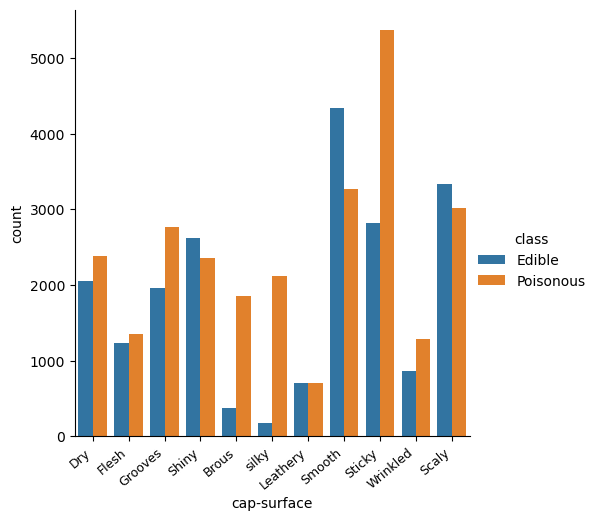

<Figure size 1600x800 with 0 Axes>

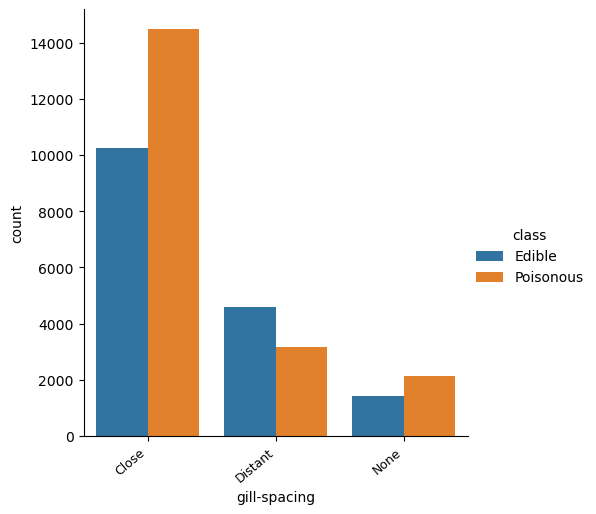

<Figure size 1600x800 with 0 Axes>

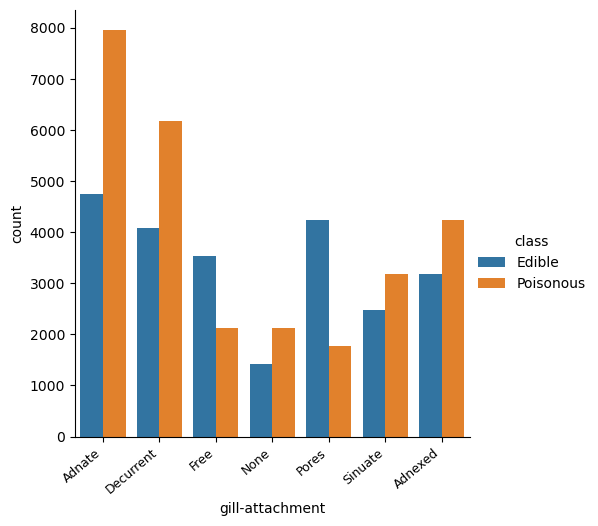

<Figure size 1600x800 with 0 Axes>

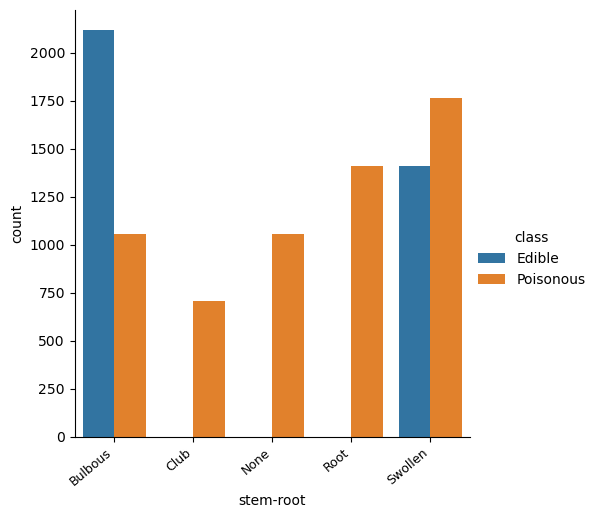

<Figure size 1600x800 with 0 Axes>

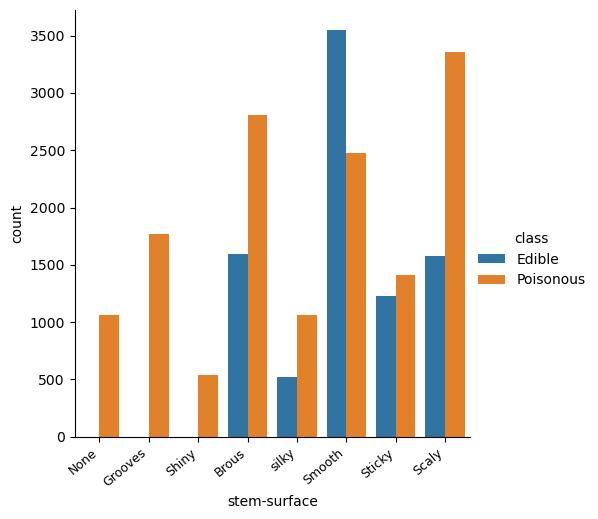

<Figure size 1600x800 with 0 Axes>

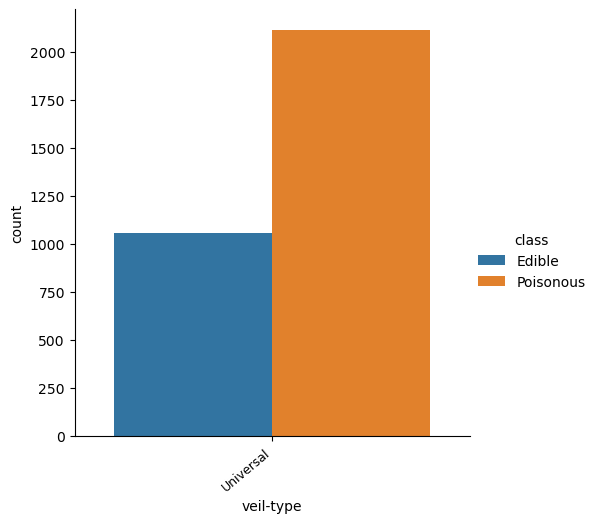

<Figure size 1600x800 with 0 Axes>

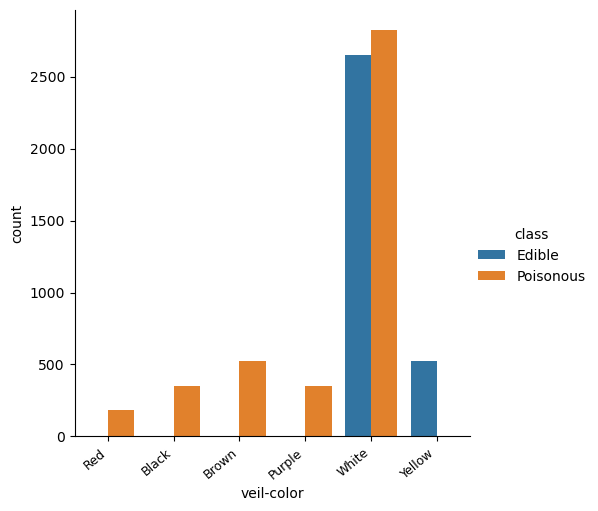

<Figure size 1600x800 with 0 Axes>

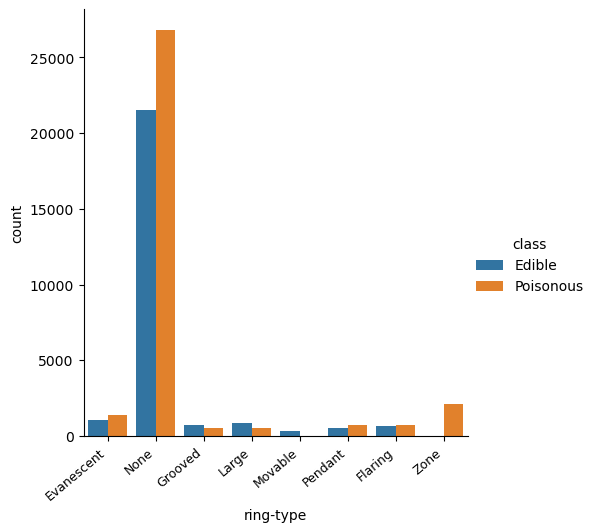

<Figure size 1600x800 with 0 Axes>

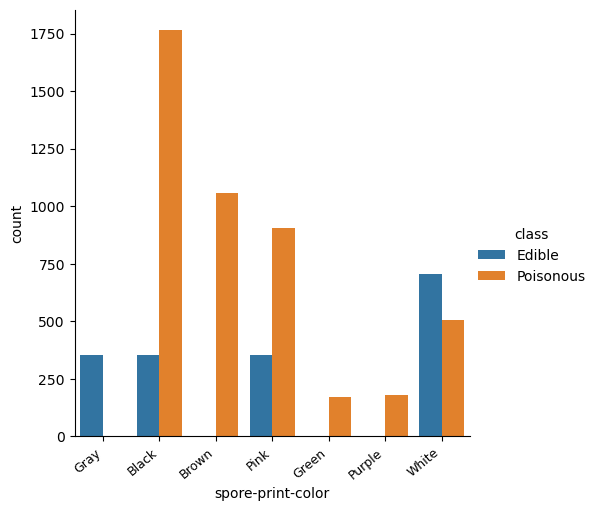

In [79]:
#Some columns feature large amounts of its rows as missing data.
#They are 9 categorical variables that have NULL values:
#cap-surface,gill-spacing,gill-attachment,stem-root,stem-surface,veil-type,veil-color,ring-type,spore-print-color

category_with_NULL=pd.DataFrame(mushroom_clean[['cap-surface', 'gill-spacing', 'gill-attachment', 'stem-root','stem-surface','veil-type','veil-color','ring-type','spore-print-color']])

for column in category_with_NULL:
    f = plt.figure(figsize=(16, 8))
    ax=sb.catplot(x = column, hue = 'class', kind = "count" ,data = mushroom_clean)
    ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 
    

### Our thought process on how to deal with NaN values

It would not be practical to remove all rows with NaN values as over 50,000 of our 61,069 values would be removed.

Next, filling in the missing values with the mode of categorical variable would not be practical, as it could cause a bias in the data, and would possibly affect the classification of these mushrooms. Many of them could be classified as edible due to the filled in data, when they could be infact poisonous. (and Vice-versa) This would not be ideal.

Lastly, we decided to do abit of Data Exploratory first to have a brief idea on the correlation between these variables and edibility. We would then remove the columns of variables that have no strong correlation to edibility.


### Result:

By observation of the grouped Bar plots, we are removing

1. **Gill Spacing**: As it does not have a very high confidence level in classifying edibility across all the different Gill Spacings.

2. **Universal Veil Type**: As it only contains one categorical level, and does not help in our investigation at all

3. **Ring Type**: As it does not have a very high confidence level in classifying edibility across the different ring types. There are only 2 ring types out of the 8 types with high confidence levels however they are <1000 in count.


We will leave the rest of columns with NaN values as they are, as we believe they will be useful in classfication due to their relatively higher confidence levels across their different features.

In [80]:
#Remove these 3 categories from dataset.

mushroom_clean.drop(['gill-spacing', 'veil-type','ring-type'], axis=1,inplace=True)
print("Data dims : ", mushroom_clean.shape)

Data dims :  (61069, 18)


In [81]:
#Add category "Unknown" for the remaining columns with NaN values
   
        
#1. Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])
        
## Call function to create new category for variables
for column in mushroom_clean:
    if (np.NaN in mushroom_clean[column].unique()):
        impute_nan_create_category(mushroom_clean,column)

#Change object back into category
mushroom_clean.loc[:,mushroom_clean.dtypes == 'object'] = mushroom_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))


print(mushroom_clean.shape)
print(mushroom_clean.isnull().sum())
mushroom_clean.info()

    

(61069, 18)
class                   0
cap-diameter(cm)        0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height(cm)         0
stem-width(mm)          0
stem-root               0
stem-surface            0
stem-color              0
veil-color              0
has-ring                0
spore-print-color       0
habitat                 0
season                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 61069 non-null  category
 1   cap-diameter(cm)      61069 non-null  float64 
 2   cap-shape             61069 non-null  category
 3   cap-surface           61069 non-null  category
 4   cap-color             61069 non-null  category
 5   does-bruise-or-bleed  61069 n

# Data Exploration and Visualisation

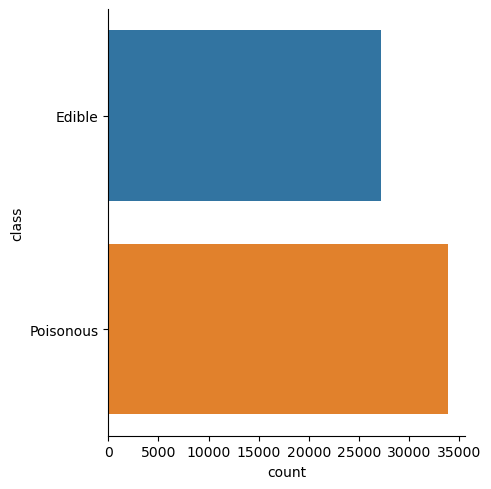

In [82]:
#Looking at the count of edible vs poisonous mushrooms in our data 
sb.catplot(y = "class", data = mushroom_clean, kind = "count")

We can see that we have a roughly equal amount of edible vs poisonous mushrooms in our data 

### Exploring the 3 numerical data columns
Numerical variables:
1. cap-diameter
2. stem-height
3. stem-width

<AxesSubplot:xlabel='stem-width(mm)'>

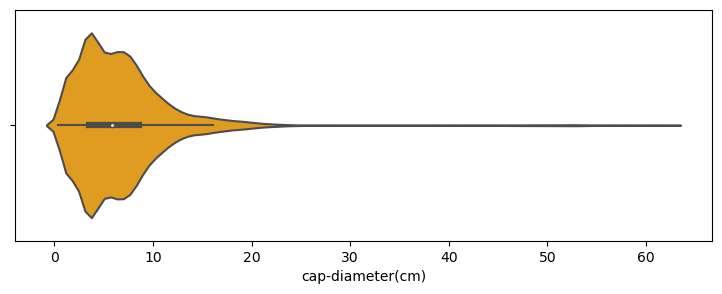

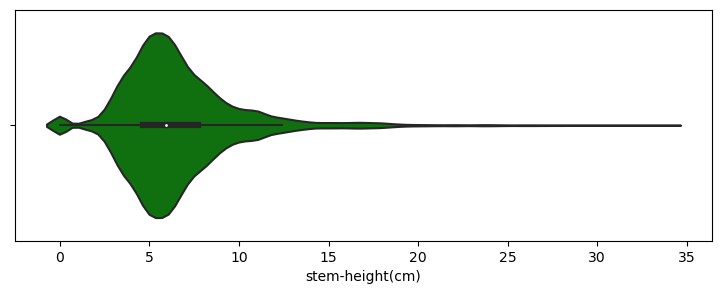

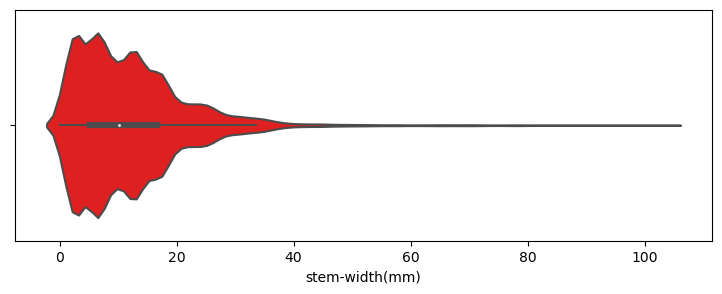

In [83]:
f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x = 'cap-diameter(cm)',color='orange')
#sb.stripplot(data=mushroom_clean,x='cap-diameter', color='grey',alpha=0.1)

f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x='stem-height(cm)',color='green')

f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_clean,x='stem-width(mm)',color='red')

#### Findings:

We can see that across all 3 numerical columns, the data is mostly populated together, with a few that are significantly longer/larger across the 3 numerical columns.

### Comparing the 3 numerical variables against Class of mushroom

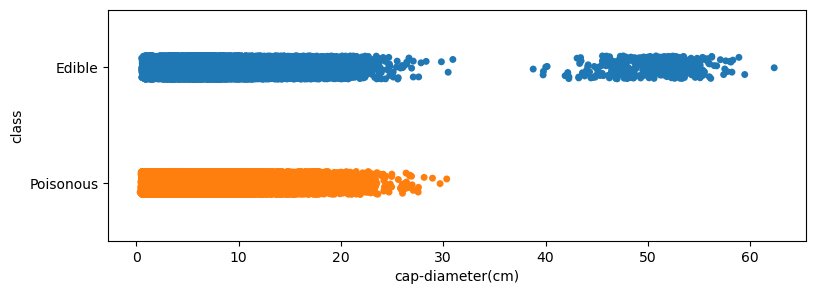

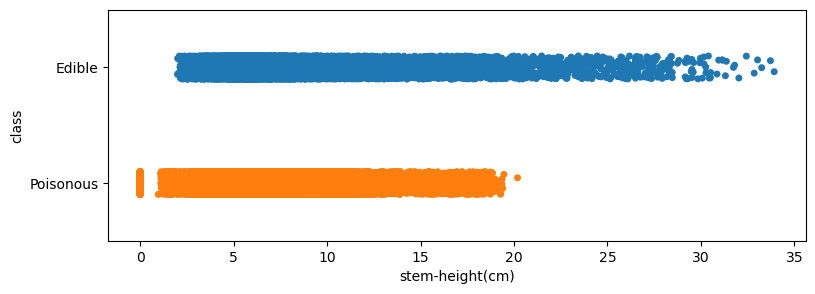

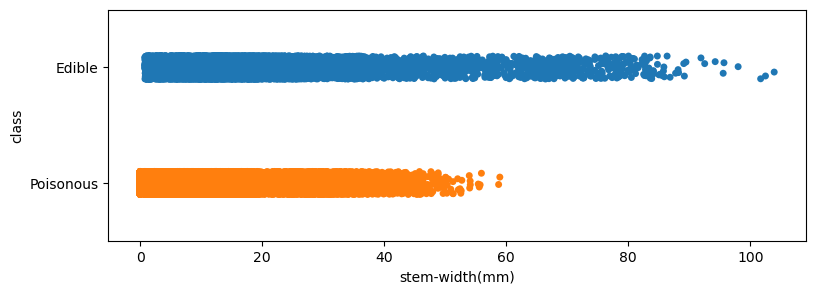

In [84]:
for column in mushroom_clean:
    if (mushroom_clean[column].dtypes == 'float64'):
        f = plt.figure(figsize=(9, 3))
        sb.stripplot(x=column, y='class', data=mushroom_clean)


#### Findings: 

We can see that for 
1. **cap-diameter** : Any mushrooms from this dataset with cap-diameter longer than 31cm is guaranteed to be edible, 100% confidence.
2. **stem-height**  : Any mushrooms from this dataset with stem-height longer than 21cm is guaranteed to be edible, 100% confidence.
3. **stem-width**   :  Any mushrooms from this dataset with stem-width longer than 60mm is guaranteed to be edible, 100% confidence.


### Exploring the 14 categorical data columns (excludes class)
Categorical variables:

1. cap-shape
2. cap-surface
3. cap-color
4. does-bruise-or-bleed
5. gill-attachment
6. gill-color
7. stem-root
8. stem-surface
9. stem-color
10. veil-color
11. has-ring
12. spore-print-color
13. habitat
14. season

C:\Users\pc\AppData\Local\Temp\ipykernel_28324\4174996883.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(9, 4))


<Figure size 900x400 with 0 Axes>

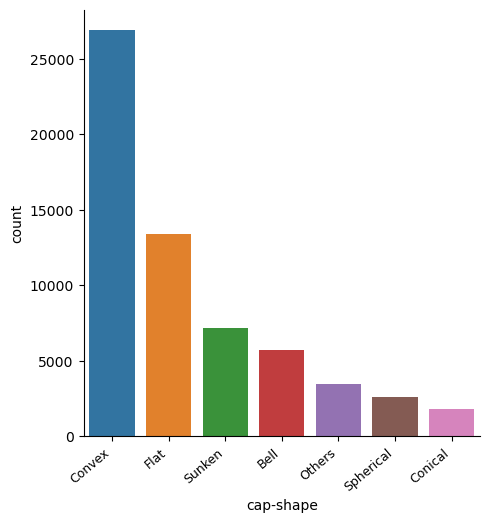

<Figure size 900x400 with 0 Axes>

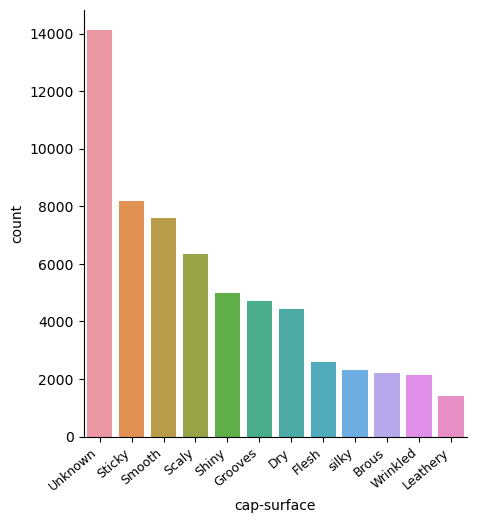

<Figure size 900x400 with 0 Axes>

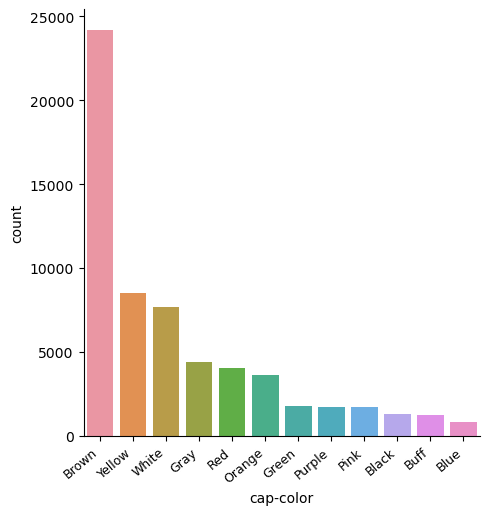

<Figure size 900x400 with 0 Axes>

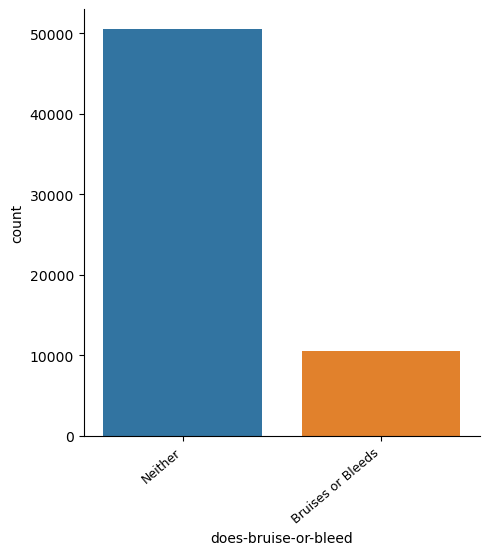

<Figure size 900x400 with 0 Axes>

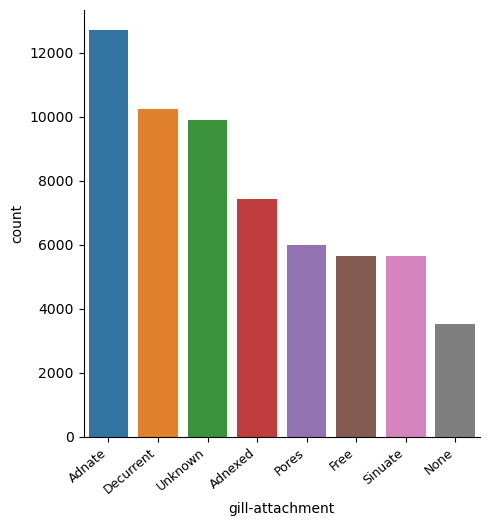

<Figure size 900x400 with 0 Axes>

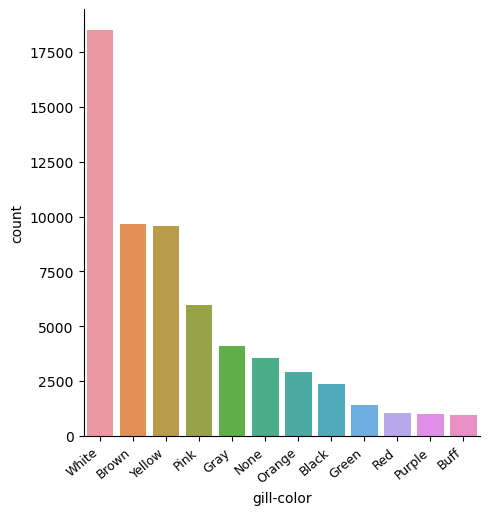

<Figure size 900x400 with 0 Axes>

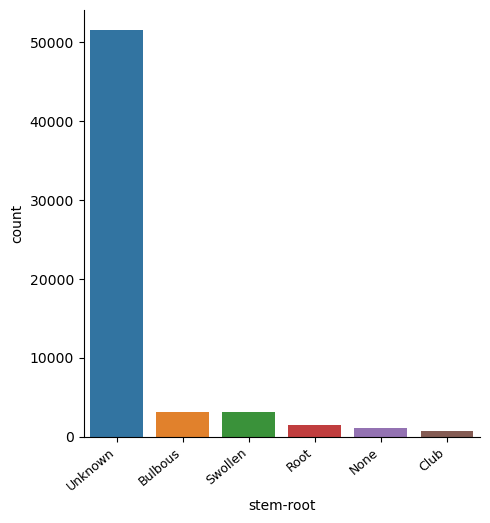

<Figure size 900x400 with 0 Axes>

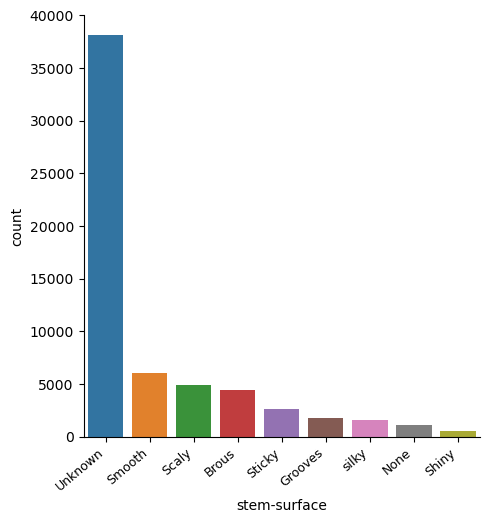

<Figure size 900x400 with 0 Axes>

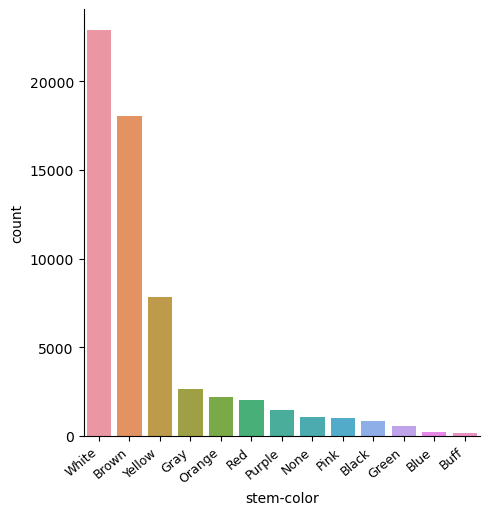

<Figure size 900x400 with 0 Axes>

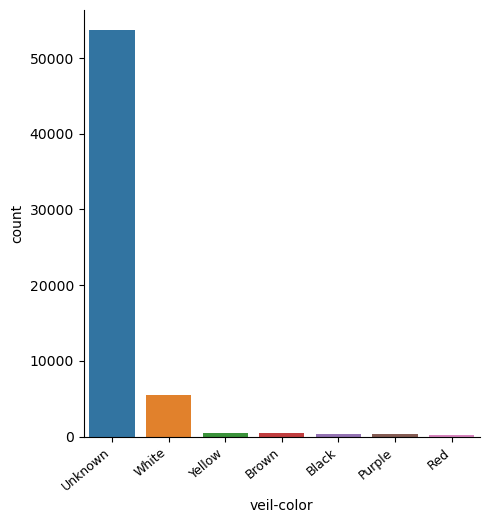

<Figure size 900x400 with 0 Axes>

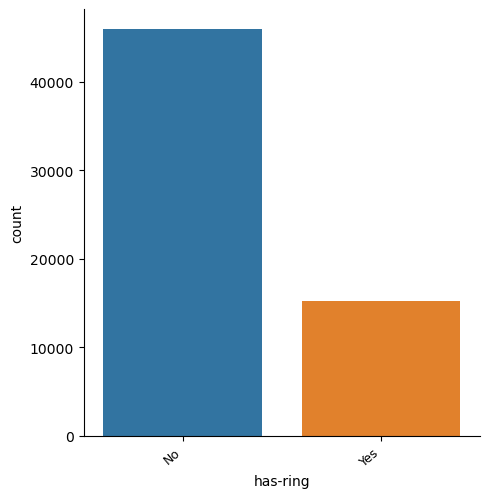

<Figure size 900x400 with 0 Axes>

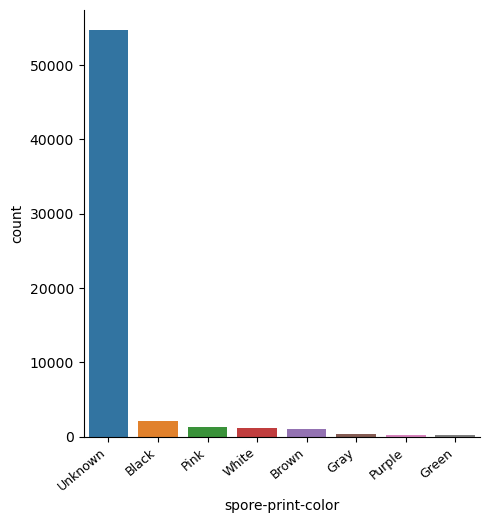

<Figure size 900x400 with 0 Axes>

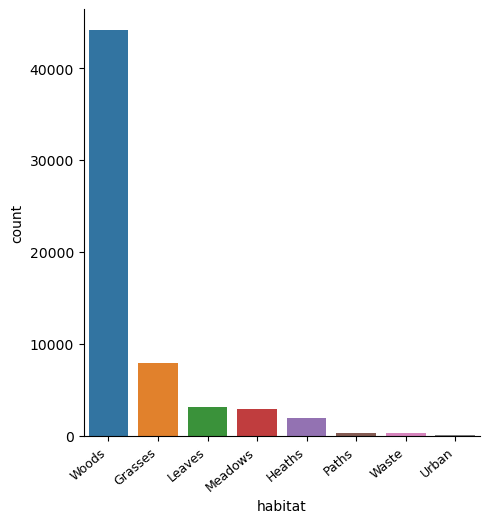

<Figure size 900x400 with 0 Axes>

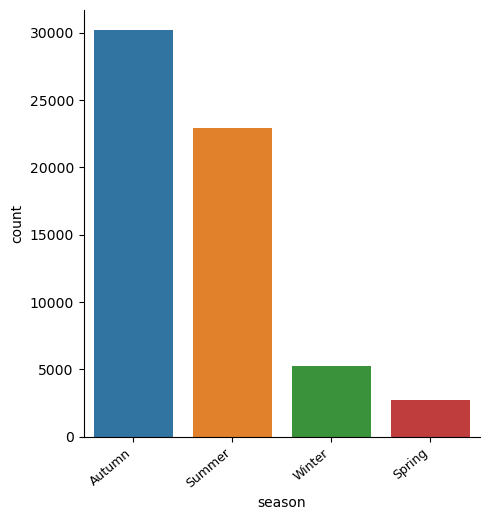

In [85]:
for column in mushroom_clean: 
    if ((mushroom_clean[column].dtypes == 'category') & (column!='class')):
        f = plt.figure(figsize=(9, 4))
        ax = sb.catplot(x = column, data = mushroom_clean, kind = "count",order=mushroom_clean[column].value_counts().index)
        ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 


#### Findings: 

We can see that most of the categorical columns are unbalanced between their features, there are some features that are common and some are very rare.

These can be seen from the colours of the different features, where colours like Brown,Yellow,White are much more common than colours such as Orange,Red,Purple,Pink,Black,Green,Blue,Gray.

2 more obseved significant unbalances are that most of the mushrooms in this dataset do not Bruise or Bleed 
and that most mushrooms are from the habitat "Woods".

### Comparing the 14 Categorical variables against Class of mushroom


<Figure size 900x400 with 0 Axes>

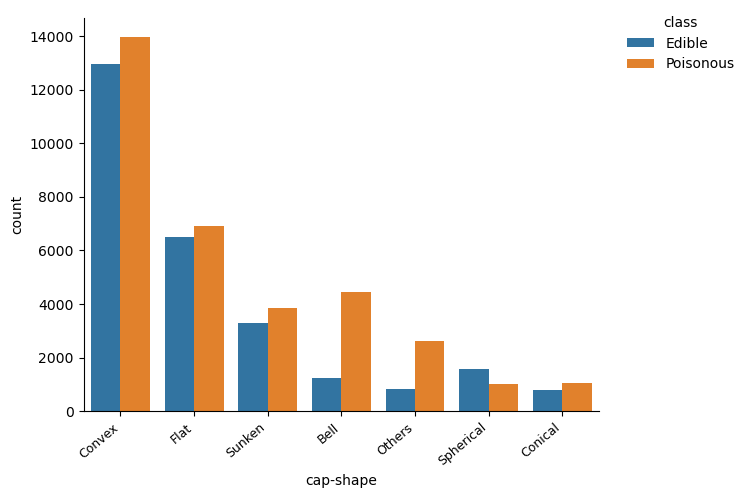

<Figure size 900x400 with 0 Axes>

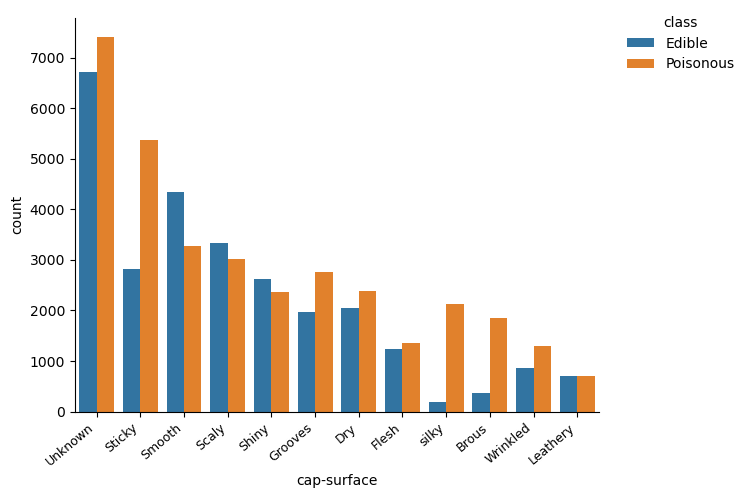

<Figure size 900x400 with 0 Axes>

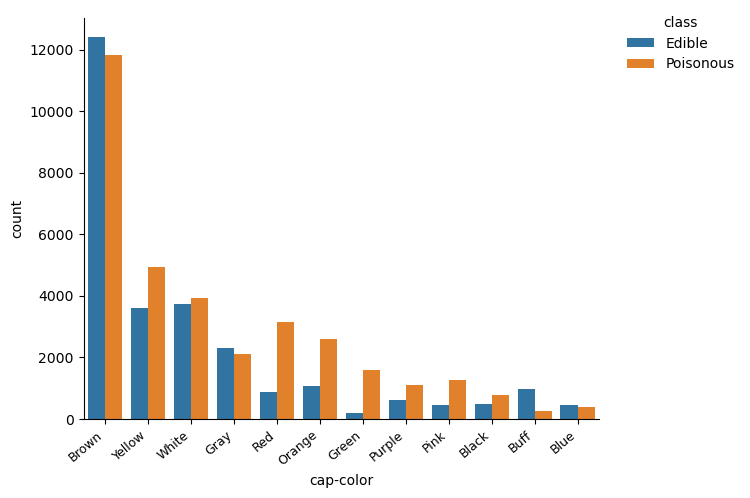

<Figure size 900x400 with 0 Axes>

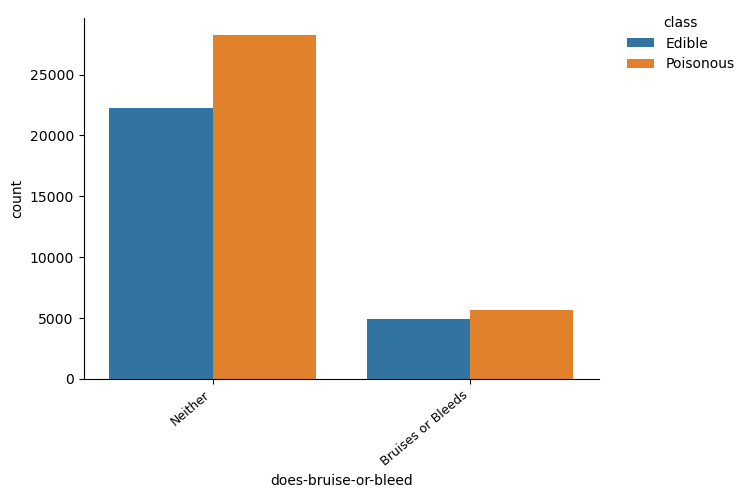

<Figure size 900x400 with 0 Axes>

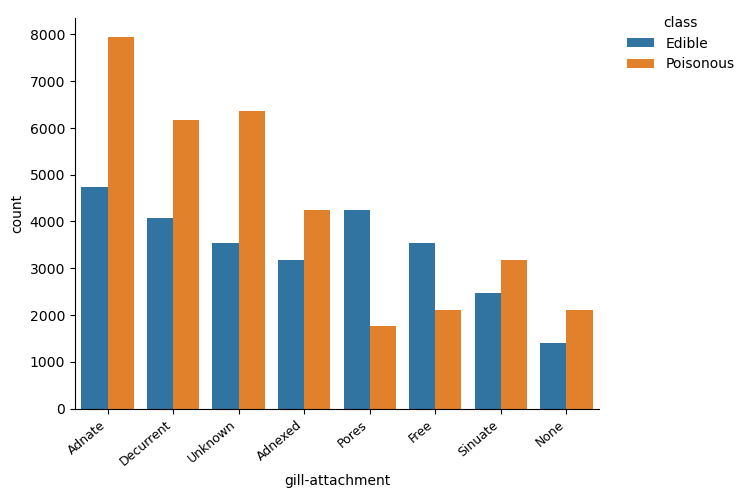

<Figure size 900x400 with 0 Axes>

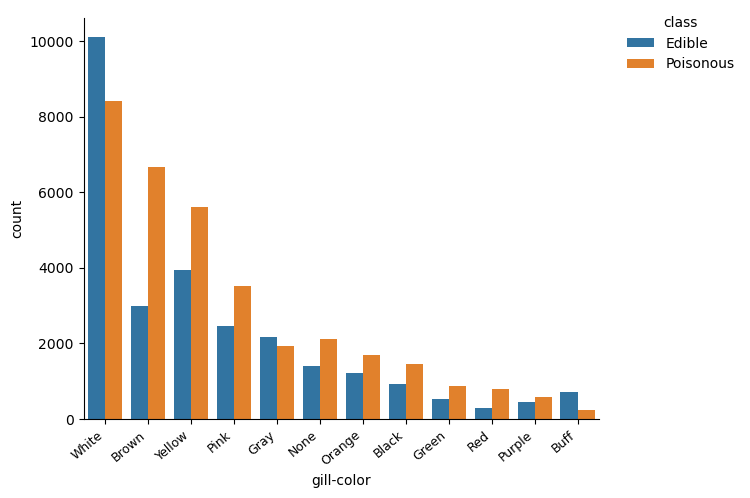

<Figure size 900x400 with 0 Axes>

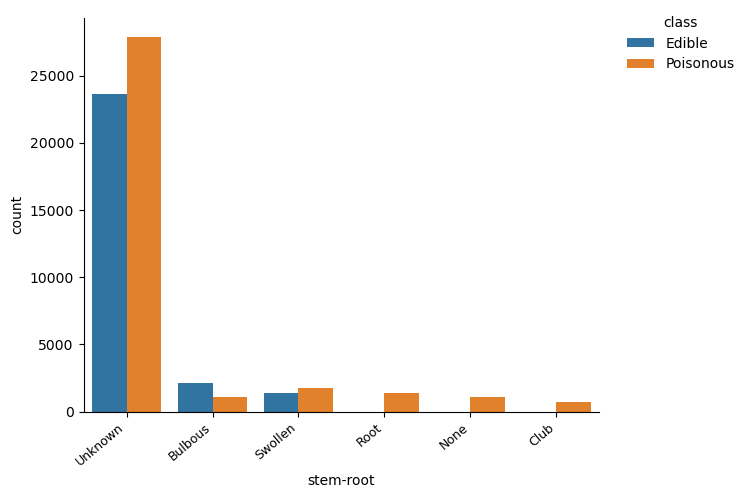

<Figure size 900x400 with 0 Axes>

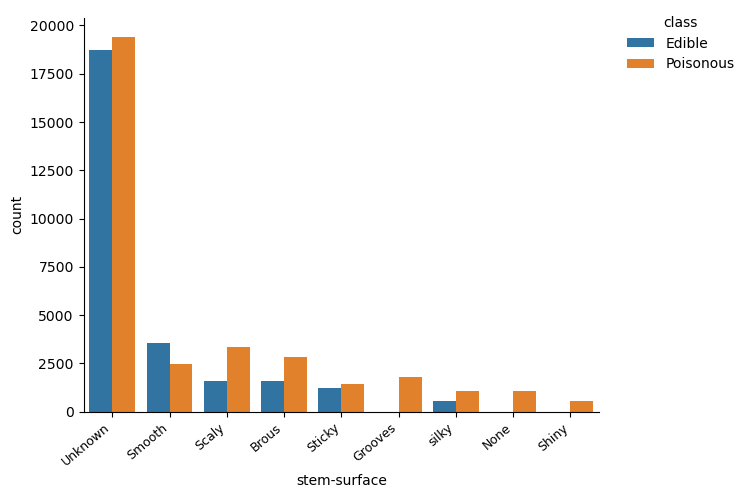

<Figure size 900x400 with 0 Axes>

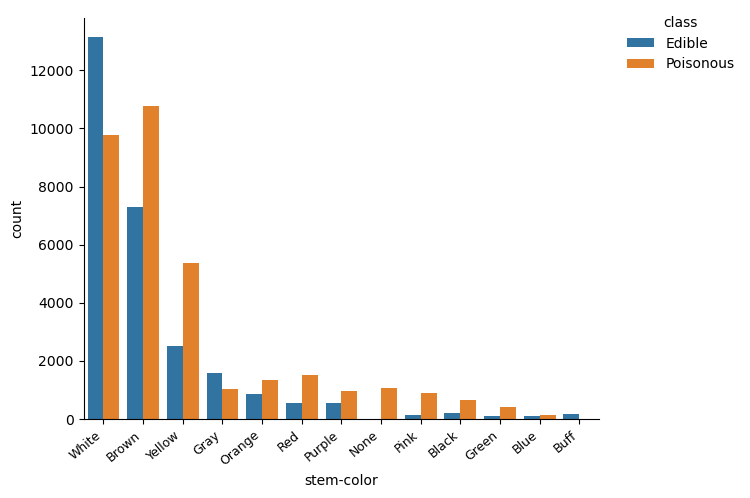

<Figure size 900x400 with 0 Axes>

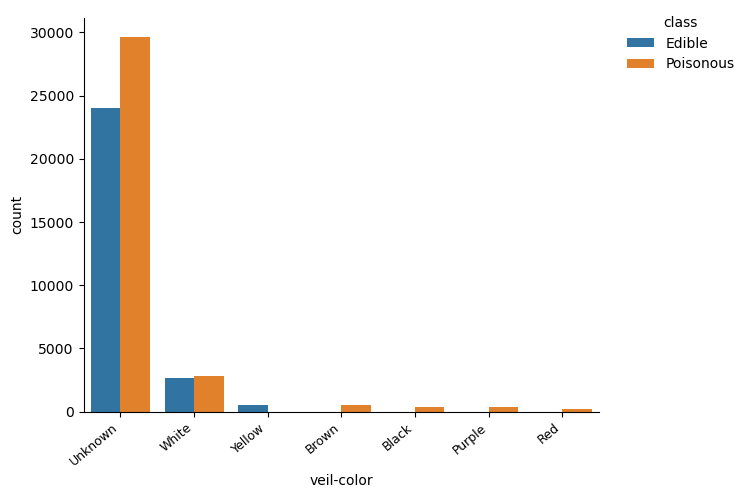

<Figure size 900x400 with 0 Axes>

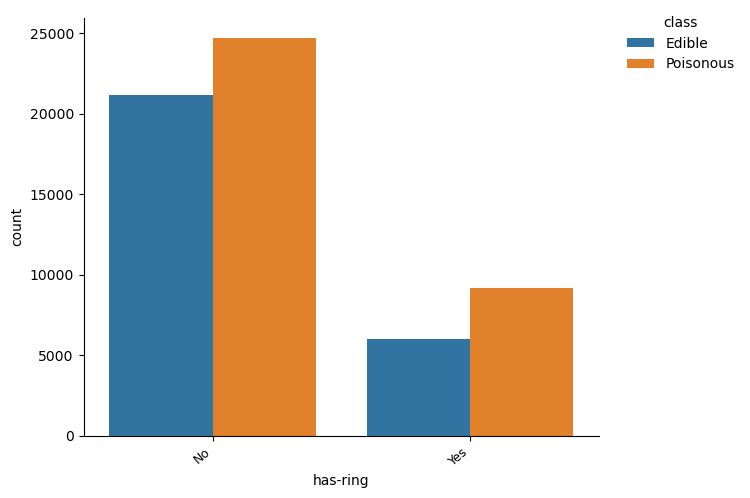

<Figure size 900x400 with 0 Axes>

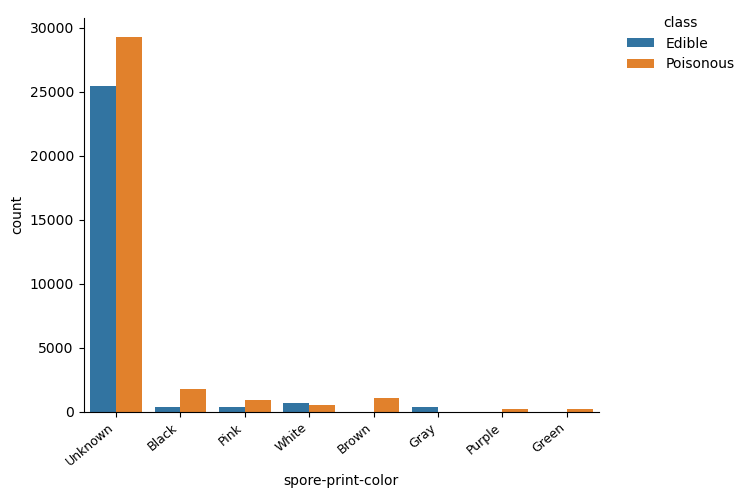

<Figure size 900x400 with 0 Axes>

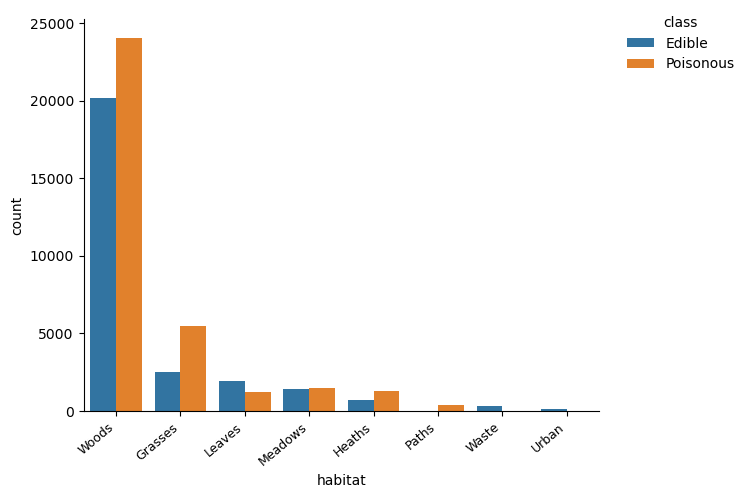

<Figure size 900x400 with 0 Axes>

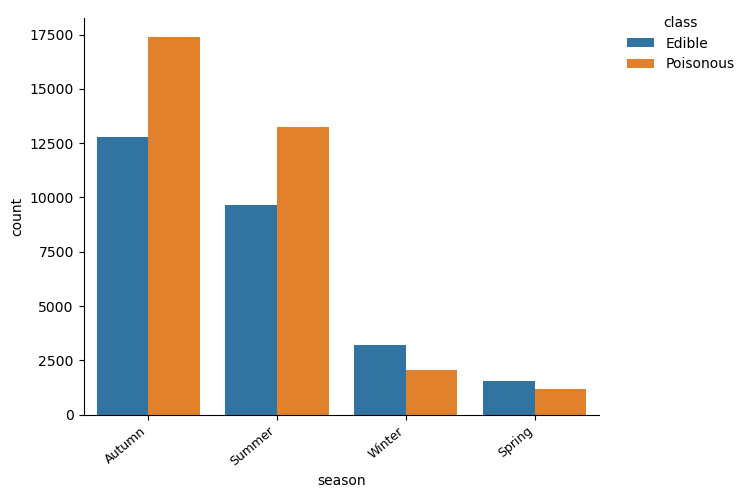

In [86]:
for column in mushroom_clean: 
    if ((mushroom_clean[column].dtypes == 'category') & (column!='class')):
        f = plt.figure(figsize=(9, 4))
        ax = sb.catplot(x = column, hue = 'class', kind = "count" ,data = mushroom_clean,order=mushroom_clean[column].value_counts().index)
        ax.set_xticklabels(rotation=40, ha="right",fontsize=9) 
        #Tilted the labels so they dont overlap
        #Arranged categories in descending order based on count
        sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) #Got the legend out of da way
        plt.tight_layout()
        plt.show()

#### Findings: 

Hii

In [87]:
#Create new data set with the categorical columns

mushroom_cat = mushroom_clean.copy()

for column in mushroom_cat: 
    if (mushroom_cat[column].dtypes == 'float64'):
        mushroom_cat.drop(column, axis=1,inplace=True)
        
mushroom_cat

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-root,stem-surface,stem-color,veil-color,has-ring,spore-print-color,habitat,season
0,Poisonous,Convex,Grooves,Orange,Neither,Free,White,Swollen,Scaly,White,White,Yes,Unknown,Woods,Winter
1,Poisonous,Convex,Grooves,Orange,Neither,Free,White,Swollen,Scaly,White,White,Yes,Unknown,Woods,Summer
2,Poisonous,Convex,Grooves,Orange,Neither,Free,White,Swollen,Scaly,White,White,Yes,Unknown,Woods,Winter
3,Poisonous,Flat,Shiny,Red,Neither,Free,White,Swollen,Scaly,White,White,Yes,Unknown,Woods,Winter
4,Poisonous,Convex,Shiny,Orange,Neither,Free,White,Swollen,Scaly,White,White,Yes,Unknown,Woods,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,Poisonous,Sunken,Smooth,Yellow,Neither,None,None,Unknown,Unknown,Yellow,Unknown,No,Unknown,Woods,Autumn
61065,Poisonous,Flat,Smooth,Yellow,Neither,None,None,Unknown,Unknown,Yellow,Unknown,No,Unknown,Woods,Autumn
61066,Poisonous,Sunken,Smooth,Yellow,Neither,None,None,Unknown,Unknown,Yellow,Unknown,No,Unknown,Woods,Summer
61067,Poisonous,Flat,Smooth,Yellow,Neither,None,None,Unknown,Unknown,Yellow,Unknown,No,Unknown,Woods,Summer


In [88]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 


for feature in mushroom_cat.columns :
    data_encoded[feature]=label.fit_transform(mushroom_cat[feature])


data_encoded

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-root,stem-surface,stem-color,veil-color,has-ring,spore-print-color,habitat,season
0,1,2,3,6,1,3,10,4,3,11,5,1,6,7,3
1,1,2,3,6,1,3,10,4,3,11,5,1,6,7,2
2,1,2,3,6,1,3,10,4,3,11,5,1,6,7,3
3,1,3,6,9,1,3,10,4,3,11,5,1,6,7,3
4,1,2,6,6,1,3,10,4,3,11,5,1,6,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,6,7,11,1,4,5,5,7,12,4,0,6,7,0
61065,1,3,7,11,1,4,5,5,7,12,4,0,6,7,0
61066,1,6,7,11,1,4,5,5,7,12,4,0,6,7,2
61067,1,3,7,11,1,4,5,5,7,12,4,0,6,7,2


In [89]:
# Building of Cramer's V function

from scipy.stats import chi2_contingency
import numpy as np


def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))
        
    
#Building of the matrix
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-root,stem-surface,stem-color,veil-color,has-ring,spore-print-color,habitat,season
class,1.00,0.04,0.05,0.06,0.00,0.05,0.04,0.05,0.07,0.07,0.03,0.00,0.04,0.03,0.01
cap-shape,0.04,1.00,0.05,0.02,0.11,0.14,0.10,0.08,0.10,0.07,0.01,0.05,0.02,0.03,0.02
cap-surface,0.05,0.05,1.00,0.03,0.06,0.08,0.05,0.05,0.07,0.04,0.05,0.11,0.07,0.03,0.01
cap-color,0.06,0.02,0.03,1.00,0.03,0.04,0.07,0.02,0.03,0.10,0.02,0.03,0.04,0.03,0.01
does-bruise-or-bleed,0.00,0.11,0.06,0.03,1.00,0.19,0.05,0.02,0.07,0.04,0.03,0.00,0.02,0.02,0.02
gill-attachment,0.05,0.14,0.08,0.04,0.19,1.00,0.20,0.07,0.09,0.07,0.05,0.18,0.04,0.03,0.02
gill-color,0.04,0.10,0.05,0.07,0.05,0.20,1.00,0.06,0.07,0.09,0.04,0.05,0.08,0.02,0.02
stem-root,0.05,0.08,0.05,0.02,0.02,0.07,0.06,1.00,0.23,0.22,0.05,0.03,0.05,0.01,0.01
stem-surface,0.07,0.10,0.07,0.03,0.07,0.09,0.07,0.23,1.00,0.18,0.02,0.07,0.03,0.03,0.01
stem-color,0.07,0.07,0.04,0.10,0.04,0.07,0.09,0.22,0.18,1.00,0.02,0.05,0.05,0.02,0.02


C:\Users\pc\AppData\Local\Temp\ipykernel_28324\1491490785.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


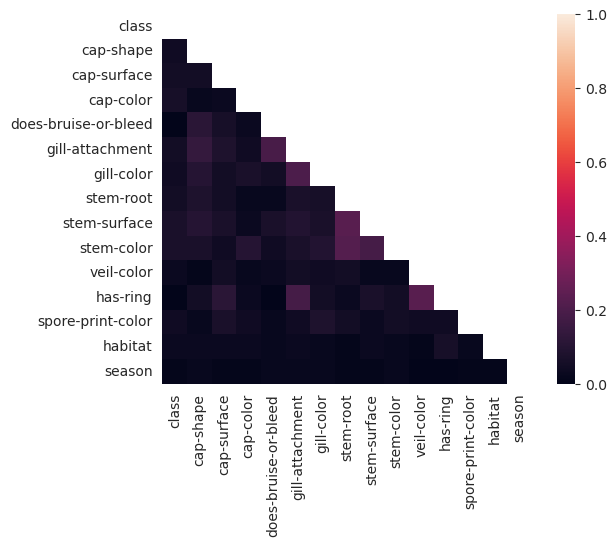

In [90]:
#Heatmap of Cramer's V correlation matrix

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


with sb.axes_style("white"):
  ax = sb.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()